# DAE 2 Designing an experiment

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning Goals
After working your way through this notebook you should be able to..

- Discuss pros and cons of 
  + Between-group designs
  + Within-group designs

- Discuss when it is appropriate to perform an experimental study  

## Table of Contents

- [1. Concerns when designing a study](#Concerns)
    - [1.1 Confounding Variables](#Confounds)
    - [1.2 Control Groups](#Control)
- [2. Good experimental designs](#GoodDesigns)    
    - [2.1 Between Group](#Between)
    - [2.2 Within Groups](#Within)
- [3. When not to use experiments](#WhenNot) 


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id= 'Concerns'> </a>

## 1 Concerns when Designing a study

When we have a research question and/or would like to test the performance of a technical solution versus another, we have to consider how best to design and set up the study.

We perform experiments to gain knowledge about whether the *independent* variable has a (measurable) effect on the *dependent* variable. 

![](variablemanipulation.png "Title")


There are a number of problems here. 

Firstly, to detect a change from our intervention, we naturally need to know what value we had before. 


...but even if we measure a change in the dependent variable, how can we be sure that this is due to our manipulation of the independent variable? 

In [2]:
#TRY OUT
#Let's say we have some measured data from a group of participants (Group_A)

A=np.array([40,30,30,40,20,50,65,35,30,65,60,30,27,42,64,50,32,30])

#And to make it convenient we put this in a data frame with index for the participants
index = [f'participant_{num}' for num in range(A.shape[0])] #generate row index for all entries

data = pd.DataFrame(A, columns=(["Case_A"]), index=index)
data

,Case_A
participant_0,40
participant_1,30
participant_2,30
participant_3,40
participant_4,20
participant_5,50
participant_6,65
participant_7,35
participant_8,30
participant_9,65


Let's say that all these are game scores and that none of the participants had played this particular game before. Why are the scores so different? 

<a id='Confounds'> </a>

### 1.2 Confounding Variables
There are, in fact, many other things other than your manipulation of the independent variable that can influence your measured data (dependent variable).

For one thing, your participants may have different prior knowledge, experiences, and preferences. There can also be factors in the actual test that have an influence, such as the place where the testing takes place, or by whom and in what way the instructions for the test are given.


A more correct illustration then looks more like this:

![](confoundingvariables.png "Title")

Many other *confounding* variables (arrows in the figure) could influence the outcome of the experiment. To be able to draw the right conclusions on the effect of the indpendent variable, a proper experiment needs control for (or randomize) *ALL* confounding variables. That is, to avoid any systematic differences that can influence the interpretation of the manipulation, ALL the possile confounding influences need either to be kept: 

*Constant* (e.g. instructions and testing set up is as far as possible done the same way for all participants)

or

*Random* (e.g. test conditions are randomly assigned to avoid any systematic effects due to presentation order).


<a id='Control'> </a>

### 1.2 Control group

Let's say we are testing a complex interactive situation (e.g. application with music that changes interactively). Here, there can be several confounding variables, and thus we should *compare* the interaction to an equivalent situation without any interaction (i.e. manipulation of the independent variable).

In this example application with music that changes interactively, we hypothesize that the interactivity will have an effect on some dependent variable (e.g. user experience). So a good control case would be the exact same application but with music that is non-interactive (i.e. prerecorded music). Since everything except the interactivity is identical between the two cases, we would assume that any change in user experience is due to the interactivity. Or?


Also, even if we control for the confounding variables we can foresee in the situation,  there can still be a lot of outcome variability due to participants just being...people. And people are different.


### Try out 1: 
We can illustrate this by adding another variable with data (Group_B) based on the original data but with some added random variability.

In [27]:
# We can illustrate this by adding another variable with data (Group_B). 
# We base this data on that of Group_A, but with some random variability added 

data['Case_B']=data.Case_A+np.random.normal(0, 1.5, data.shape[0])

# We can use describe to get an overview and see that the values are a bit different
data.describe()

,Case_A,Case_B
count,18.000000,18.000000
mean,41.111111,41.691710
std,14.482805,14.194665
min,20.000000,22.032634
25%,30.000000,31.250782
50%,37.500000,38.236262
75%,50.000000,49.011344
max,65.000000,66.651939


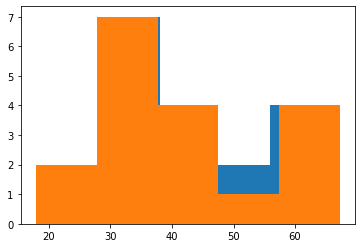

In [26]:
# We can plot the data in histograms
plt.hist(data.Case_A, bins=5)
plt.hist(data.Case_B, bins=5)
plt.show()
# Note that the data can look very similar for the two groups. 
# Because we're adding random numbers based on a normal distribution with mean 0, the values might not change much. 
# If you're lucky. 
# But, being random, it can also vary a lot more.
# Re-run the randomization code above and plot again to convince yourself that the values change slightly between runs.

### NOTE: 
With this number of participants, you can see that even small random variations can lead to differences in the outcome data. More on how what conclusions we can draw from the data in later chapters.

<a id= 'GoodDesigns'> </a>

## 2. Good experimental designs

There are basically two type of designs for well-conducted experiments:

*Between group* where each level of the manipulated independent variable is presented to a different group of participants. 

and

*Within group* all participants are exposed to the different levels of the manipulated independent variable.


<a id= 'Between'> </a>

### 2. Between-Group Design

In the between-group design, you randomly assign participants to one of the experimental conditions. The random assignment is helps minimizes the influence of any *systematic* differences between the groups that might affect data. However, you might also wish to keep the sample sizes for the two groups approximately equal, so sometimes semi-random is necessary. This can, for instance, mean that you monitor the number of participants assigned to any one condition and, if already many more than the other condition,  reduce the probability of the remaining participants being assigned to this condition. 

<img src="https://github.com/sofiadahl/Design_and_Analysis_of_Experiments/blob/main/BetweenGroupDesign.png?raw=1" width="600">

Since participants are only exposed to ONE condition (e.g. interface with OR without interactive music), there is no learning or carry-over effect between conditions. 

### Try out 2: 
Let's revisit our Case_B and now insert some SYSTEMATIC variability, that we (hope) is from our manipulation

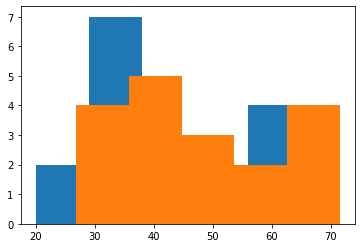

In [30]:
#now insert some SYSTEMATIC variability, that we (hope) is from our manipulation

data['Case_B']=data.Case_A+np.random.normal(6, 1.5, data.shape[0])

plt.hist(data.Case_A, bins=5)
plt.hist(data.Case_B, bins=5)
plt.show()

The systematic variability that we simulated (mean=6) shifts the histogram of Case_B to the right. When we plan the experiment, this is something we hope to see. A statistical test for *between-group* design tests whether the outcome scores for the different cases have means that differ *significantly* from each other.

But there is still a lot of variability among the participants. In fact, the individual differences can overshadow the effect we want to measure. In this regard, it would be better if participants were the same for the two conditions.

<a id= 'Within'> </a>

### 2. Within-Group Design

One way to minimize the risk that individual variability overshadows any possible effect, is to let participants take part in both the experimental and the control condition. The benefit is that the variability due to individual differences is reduced, and this typically means that fewer participants are needed in order to spot an effect. 
But there are many other things that might spoil it. Again, it is important that there is no *systematic* effect of the order in which the conditions are presented, as well as and how participants are assigned. Participants can get tired, bored, more skilled, etc as they go through the test. Any such *order effects* need to be accounted for. 

<img src="https://github.com/sofiadahl/Design_and_Analysis_of_Experiments/blob/main/WithinGroupDesign.png?raw=1" width="700">


### Try out 3: 
Plot the difference between the different cases but for the same participants.

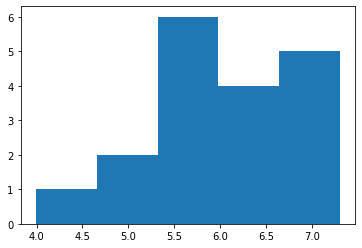

In [31]:
# When participants are the same, we are interest in the difference WITHIN them BETWEEN the two conditions. 

data['Case_C']=data.Case_B-data.Case_A

plt.hist(data.Case_C, bins=5)

plt.show()

So the histogram showes the *difference* in outcome scores between two cases. What do we compare that with you wonder? Well, if there had been NO difference, the plotted values would be (or be close to) zero. A statistical test for *within group* design, tests whether the difference between outcome scores has a mean significantly different from 0.

<a id= 'WhenNot'> </a>

## 3. When not to use experiments

We have talked a lot about how we need to *control* a lot of variables to be able to interpret our data in a way that can confirm whether a manipulation has had an effect.

There are many situations where it is not possible, or ethical, to do full experimental control. In other cases, controlling all variables results in an enviroment that has little in common with reality (e.g. the experience of going to a concert vs. hearing music alone in a sound-proof listening booth.)

In other cases, a full-fledged experiment is simply overkill. In order to find out if your design and implementation is on the right track, user testing with a handful of participants is much more economical because you want to identify potential flaws, not measure an overall effect.

